## Tensorflow Learning
This demo shows a simple training for recognizing numbers using the classic mnist training set.
This is such a classic, that there are many Tensorflow examples on this training set ([Tensorflow](https://www.tensorflow.org/get_started/mnist/pros) and [aymericdamien](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/2_BasicModels/logistic_regression.py)), but it's still fun to play with.

This uses more foundational Tensorflow rather than using tflearn.  It uses one hidden layer and dropout.

### Loading Data
We start by loading the training data and displaying some basic information on that data.

In [28]:
import tensorflow as tf
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
batch = mnist.train.next_batch(100)
x, y = batch[0], batch[1]  # obtain numpy arrays for 100 chars w/ one_hot output
print('x shape = ', x.shape, '  y shape = ', y.shape)
print('Total Data Points = %d' % mnist.train.num_examples)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
x shape =  (100, 784)   y shape =  (100, 10)
Total Data Points = 55000


### Define Model
A very simple two layer model (includes one hidden layer) and also uses dropout.

For a more accurate model:
* Try adding additional layer(s)
* Try adding regularization (e.g. add tf.nn.l2_loss() for each of the weights to the cost function)

In [39]:
tf.reset_default_graph()

keep_prob = tf.placeholder(tf.float32, name="dropout")  # scalar variable

input_size = 784  # 28*28 monochrome image
mid_size = 200  # size of the middle layer
output_size = 10 # size of the output for selecting one of the 10 digits

x = tf.placeholder(tf.float32, shape=[None, input_size], name='x_data')
y = tf.placeholder(tf.float32, shape=[None, output_size], name='y_data')

weights1 = tf.Variable(tf.random_normal([784, mid_size], stddev=0.25), name="weights1")
biases1 = tf.Variable(tf.zeros([mid_size]), name="biases1")

weights2 = tf.Variable(tf.random_normal([mid_size, output_size], stddev=0.25), name="weights2")
biases2 = tf.Variable(tf.zeros([output_size]), name="biases2")

# Dropout can optionally be added here
hidden1 = tf.nn.dropout(tf.nn.relu(tf.matmul(x, weights1) + biases1), keep_prob)
# hidden1 = tf.nn.relu(tf.matmul(x, weights1) + biases1)
prediction = tf.nn.softmax(tf.matmul(hidden1, weights2) + biases2)

error = tf.reduce_mean(-tf.reduce_sum(y*tf.log(prediction), reduction_indices=1))
optimizer = tf.train.AdamOptimizer(1e-4)
train = optimizer.minimize(error)

init_op = tf.global_variables_initializer()

### Training
Trains the model in batches and collects data on both the training error and the testing error.

In [40]:
train_batch_size = 100
test_batch_size = 1000
epoch_count = 101
mini_batch_count = mnist.train.num_examples // train_batch_size
testing_interval = 5

#  Lists for storing error values for later graphing
training_error_values = []
testing_error_values = []

with tf.Session() as sess:
    sess.run(init_op)
    for epoch in epoch_values:
        for mini_batch in range(mini_batch_count):
            batch_xs, batch_ys = mnist.train.next_batch(train_batch_size)
            # Get the resulting error value and do the training
            error_val, _ = sess.run([error, train], feed_dict={x: batch_xs, y: batch_ys, keep_prob: 0.90})
        training_error_values.append(error_val)
        if(epoch % testing_interval == 0):
            batch_xs, batch_ys = mnist.test.next_batch(test_batch_size)
            # Just get the error value (no training is done on the testing cycle)
            error_val = sess.run(error, feed_dict={x: batch_xs, y: batch_ys, keep_prob: 1.0})
            testing_error_values.append(error_val)
            print("Epoch: %3d  Testing Error: %.3f" % (epoch, error_val))


Epoch:   0  Testing Error: 0.950
Epoch:   5  Testing Error: 0.327
Epoch:  10  Testing Error: 0.214
Epoch:  15  Testing Error: 0.147
Epoch:  20  Testing Error: 0.098
Epoch:  25  Testing Error: 0.085
Epoch:  30  Testing Error: 0.109
Epoch:  35  Testing Error: 0.097
Epoch:  40  Testing Error: 0.127
Epoch:  45  Testing Error: 0.079
Epoch:  50  Testing Error: 0.117
Epoch:  55  Testing Error: 0.083
Epoch:  60  Testing Error: 0.092
Epoch:  65  Testing Error: 0.094
Epoch:  70  Testing Error: 0.077
Epoch:  75  Testing Error: 0.083
Epoch:  80  Testing Error: 0.067
Epoch:  85  Testing Error: 0.087
Epoch:  90  Testing Error: 0.067
Epoch:  95  Testing Error: 0.088
Epoch: 100  Testing Error: 0.077


### Graph the results
The plot shows the error versus the epoch number for both the training and the testing data sets.

As expected, the error is higher on the testing data set than it is for the training data set.

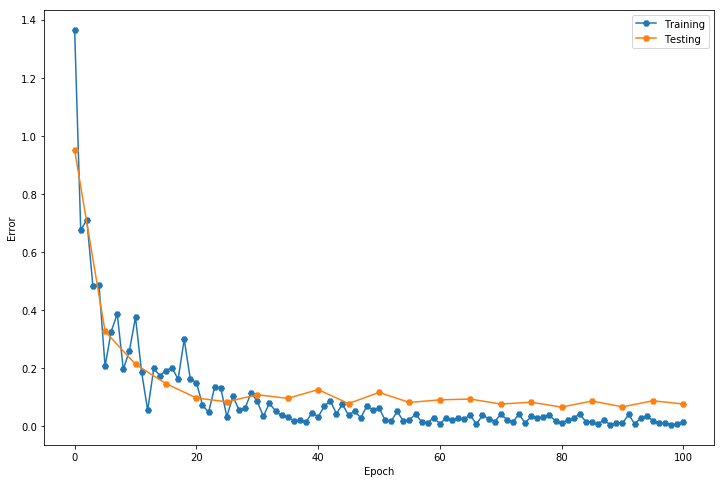

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(range(epoch_count), training_error_values, '-H', label='Training')
plt.plot(range(0, epoch_count, testing_interval), testing_error_values, '-H', label='Testing')
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.legend()
plt.show();